In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

## import Classifiers from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import os
os.environ['NUMEXPR_MAX_THREADS'] = '16'

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

C:\Users\rutsm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

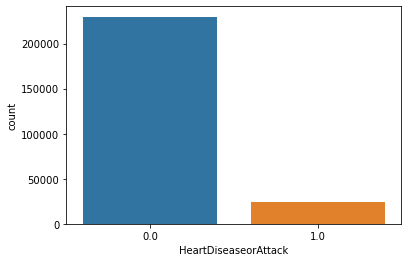

In [4]:
## 1 = contracted heart disease/heart attack
## 2 = did not
sns.countplot(df['HeartDiseaseorAttack'])

## Data Preprocessing

In [5]:
## set feature array X and target array y
X = df.drop(columns=['HeartDiseaseorAttack', 'CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income'], axis=1)
y = df['HeartDiseaseorAttack']

In [6]:
## split data into X_train, y_train, X_test, y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Fit Model

In [9]:
pipeline = Pipeline([('StandardScaler', StandardScaler()), ('SVC', SVC(verbose=True))], verbose=True)
pipeline.fit(X_train, y_train)

y_hat = pipeline.predict(X_test)

f1 = metrics.f1_score(y_test, y_hat, average='weighted')
precision = metrics.precision_score(y_test, y_hat, average='weighted')
recall = metrics.recall_score(y_test, y_hat, average='weighted')
accuracy = metrics.accuracy_score(y_test, y_hat)

print(f'''
Model: SVC
f1_score: {f1}
precision: {precision}
recall: {recall}
accuracy: {accuracy}''')

[Pipeline] .... (step 1 of 2) Processing StandardScaler, total=   0.0s
[LibSVM][Pipeline] ............... (step 2 of 2) Processing SVC, total=14.4min

Model: SVC
f1_score: 0.8681028283855053
precision: 0.8775417995483961
recall: 0.9074555870913487
accuracy: 0.9074555870913487


In [11]:
import pickle
with open('../application/static/joblib_Model.pkl', 'wb') as f: pickle.dump(pipeline, f)